**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats

In [8]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [9]:
df

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,798279589,8-May-20,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0
9995,798314158,17-Jul-20,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0
9996,798339820,23-Mar-20,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0
9997,798371242,16-May-20,0,0.0,0,0.0,53,715.5000,0.0226,0.0363,0.0000,Windows,2,Italy,3,Returner,0


## Data Access, Exploration and Understanding

In [10]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [12]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [83]:
techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [13]:
df = df.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [14]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")

In [36]:
# Checkind datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
day                                    int64
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [16]:
# confirming that the last day of every month is correct
df.groupby(df['Date'].dt.month).max()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Date,,,,,,,,,,,,,,,,,
2,2020-02-29,10,1005.6667,4,94.0000,128,5062.2138,0.2,0.2,54.1798,iOS,7,United Kingdom,6,Returner,1,29
3,2020-03-31,24,2047.2348,16,1467.0000,328,12983.7877,0.2,0.2,261.4913,iOS,10,United Kingdom,14,Returner,1,31
5,2020-05-31,24,2629.2540,24,2050.4333,705,43171.2334,0.2,0.2,254.6072,iOS,12,United Kingdom,15,Returner,1,31
6,2020-06-30,24,618.0667,9,985.4833,262,12449.9000,0.2,0.2,166.3736,iOS,13,United Kingdom,15,Returner,1,30
7,2020-07-31,19,2407.4238,7,2195.3000,486,23050.1041,0.2,0.2,79.4435,iOS,10,United Kingdom,15,Returner,1,31
8,2020-08-31,23,1427.0250,9,812.0000,686,23342.0821,0.2,0.2,153.5777,iOS,10,United Kingdom,15,Returner,1,31
9,2020-09-30,19,1251.2000,10,1511.7000,439,23888.8100,0.2,0.2,154.0955,iOS,11,United Kingdom,14,Returner,1,30
10,2020-10-31,18,1672.0333,7,1529.2000,518,11976.7214,0.2,0.2,246.7586,iOS,10,United Kingdom,15,Returner,1,31
11,2020-11-30,27,2137.1127,14,1830.5000,584,27009.8594,0.2,0.2,361.7637,iOS,13,United Kingdom,15,Returner,1,30


In [34]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] #113
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
104650368,2020-11-05,1,0.0,0,0.0,14,1125.8750,0.0000,0.0429,0.0000,Windows,2,Portugal,2,Returner,0,5
107375098,2020-08-07,1,0.0,3,69.0,15,352.8750,0.0000,0.0556,0.0000,Windows,2,Spain,2,Returner,0,7
113677580,2020-11-28,1,0.0,0,0.0,39,1159.5417,0.0013,0.0313,0.0000,Windows,2,Other,2,Returner,1,28
115628954,2020-05-23,2,0.0,0,0.0,0,0.0000,0.2000,0.2000,0.0000,Android,2,Portugal,6,Returner,0,23
116343256,2020-10-11,1,0.0,1,66.4,14,668.3167,0.0143,0.0286,44.8935,iOS,2,Portugal,15,Returner,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776479996,2020-06-26,1,0.0,0,0.0,12,277.4500,0.0600,0.0900,0.0000,MacOSX,2,Spain,13,Returner,0,26
776570163,2020-05-25,1,0.0,0,0.0,27,889.0000,0.0214,0.0679,0.0000,iOS,1,Spain,3,Returner,0,25
778884123,2020-05-26,1,0.0,0,0.0,90,5621.5992,0.0000,0.0131,2.0990,Windows,2,Italy,2,Returner,0,26


In [40]:
df=df[~(((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
((df['Product_Pages']==0) & (df['Product_Pages']>0))|
((df['Product_Pages']>0) & (df['Product_Pages']==0)))]

In [43]:
df

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0,23


In [24]:
289/9999

0.028902890289028902

### Removing Outliers From Data

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped 119 records (1.2%).

In [47]:
#Define metric and non-metric features. Why?
metric_features = df.select_dtypes(include=np.number).columns.tolist()
metric_features
#metric_features = df.columns.drop(non_metric_features).to_list()

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'Browser',
 'Type_of_Traffic',
 'Buy',
 'day']

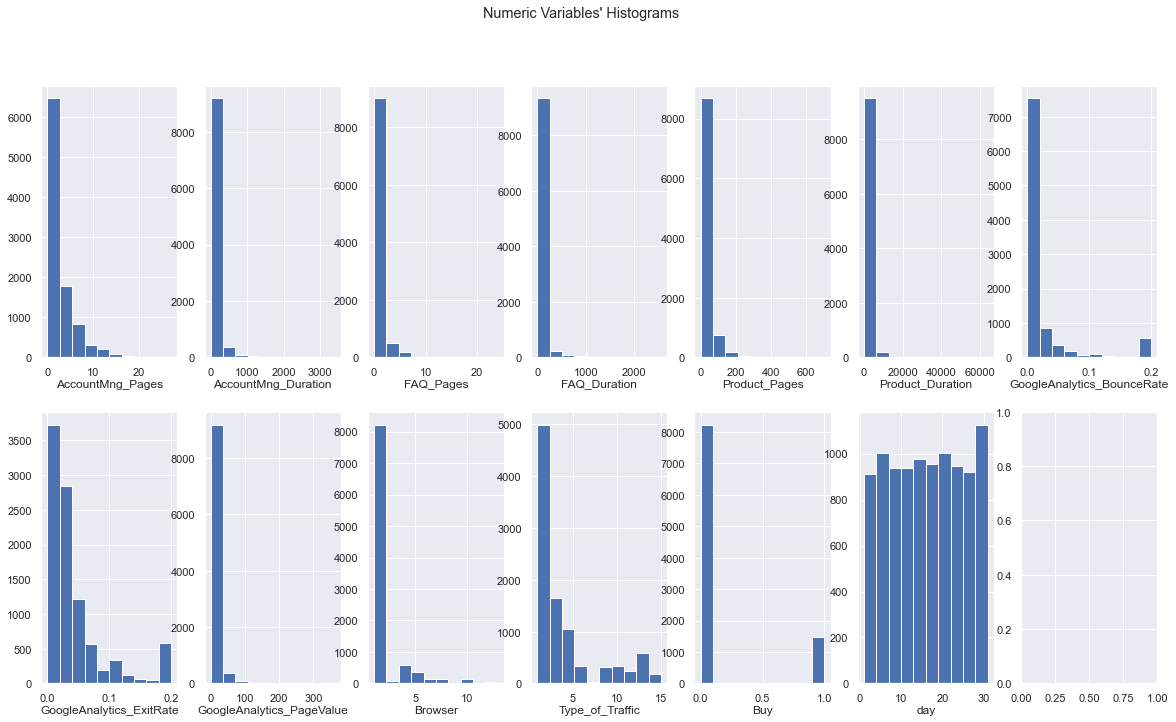

In [56]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig("teste.png")

In [71]:
# This may vary from session to session, and is prone to varying interpretations.
# A simple example is provided below:

filters = (
    (df['AccountMng_Pages']<=20)
     &
     (df['AccountMng_Duration']<=1200)
     &
     (df['FAQ_Pages']<=10)
     &
     (df['FAQ_Duration']<=900)
     &
     (df['Product_Pages']<=210)
     &
     (df['Product_Duration']<=17000)
     #&
     #(df['GoogleAnalytics_BounceRate']<=0.15)
     &
     (df['GoogleAnalytics_PageValue']<=120)
     &
     (df['Browser']<=12))

df[filters]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0,23


In [75]:
9412/9710

0.9693099897013389

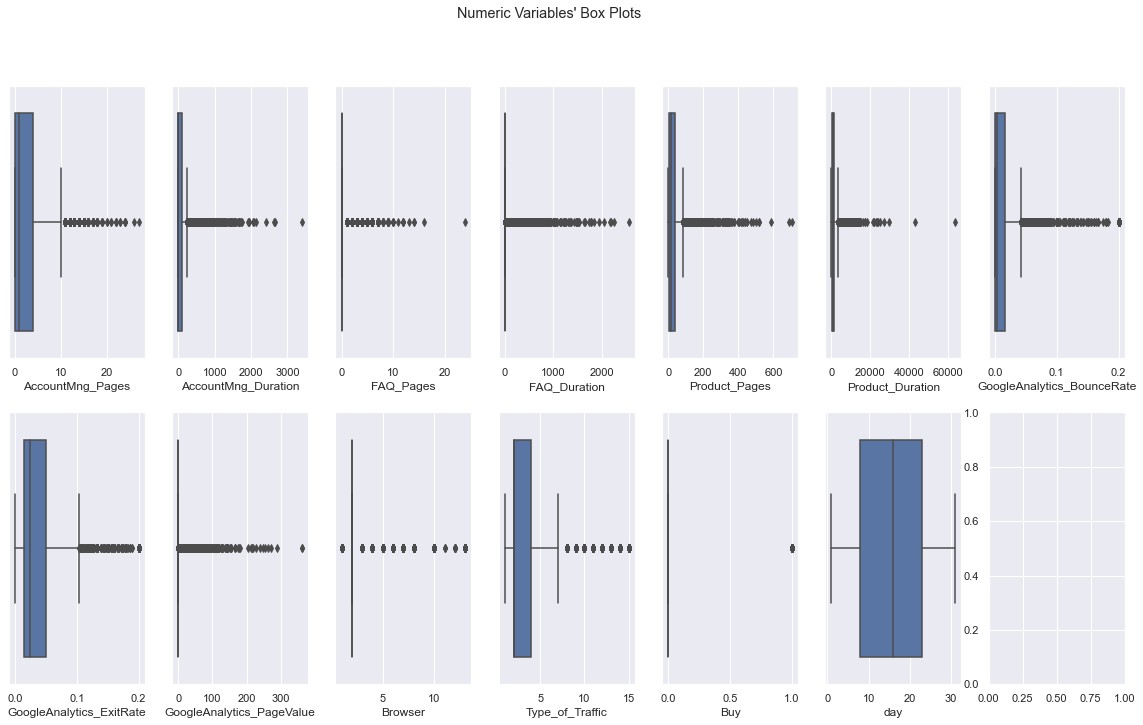

In [76]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [81]:
q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_8200/3733093585.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_8200/3733093585.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df[filters2]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [77]:
def drop_outliers(df, z_score, *columns):
    """Removes all outliers from relevant columns.

    Args:
        df (DataFrame): [DataFrame to apply function to]
        z_score (int): [Standard deviations away from mean from to drop values from]

    Returns:
        DataFrame: [Filtered dataframe]
    """

    initial_length = len(df)

    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            inital_length_col = len(df)
            df = df[~(np.abs(stats.zscore(df["FAQ_Pages"])) > z_score)]
            final_length_col = len(df)
            print("-------------------------------")
            print(f"Flitering: {col}\nDropped {inital_length_col-final_length_col} ({round(((inital_length_col-final_length_col)/inital_length_col)*100,2)}%) records")
        else:
            df[col]=df[col]

    final_length = len(df)
    print("-------------------------------")
    print("-------------------------------")
    print(f"Removed: {initial_length - final_length} ({round(((initial_length - final_length)/initial_length)*100,2)}%) records.\n ")

    return df

In [80]:
train_no_outliers = drop_outliers(train,3)

-------------------------------
Flitering: Access_ID
Dropped 216 (2.16%) records
-------------------------------
Flitering: AccountMng_Pages
Dropped 180 (1.84%) records
-------------------------------
Flitering: AccountMng_Duration
Dropped 313 (3.26%) records
-------------------------------
Flitering: FAQ_Pages
Dropped 592 (6.37%) records
-------------------------------
Flitering: FAQ_Duration
Dropped 844 (9.7%) records
-------------------------------
Flitering: Product_Pages
Dropped 0 (0.0%) records
-------------------------------
Flitering: Product_Duration
Dropped 0 (0.0%) records
-------------------------------
Flitering: GoogleAnalytics_BounceRate
Dropped 0 (0.0%) records
-------------------------------
Flitering: GoogleAnalytics_ExitRate
Dropped 0 (0.0%) records
-------------------------------
Flitering: GoogleAnalytics_PageValue
Dropped 0 (0.0%) records
-------------------------------
Flitering: Browser
Dropped 0 (0.0%) records
-------------------------------
Flitering: Type_of_

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_8200/581299385.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col]


In [197]:
train_no_outliers[~(np.abs(stats.zscore(train_no_outliers["FAQ_Pages"])) > 5)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
Access_ID,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
103117814,2020-05-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
103201891,2020-12-04,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
103226087,2020-12-22,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
103237767,2020-03-04,3,13.0,0,0.0,28,324.7692,0.0000,0.0017,0.0000,Windows,2,Portugal,6,Returner,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798164578,2020-05-08,0,0.0,0,0.0,16,462.7333,0.0125,0.0469,0.0000,Android,1,Portugal,3,Returner,0
798314158,2020-07-17,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,Windows,10,Spain,5,New_Access,0
798339820,2020-03-23,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,MacOSX,2,France,3,Returner,0
